In [3]:
%matplotlib inline

In [2]:
import ast
from calendar import month_name, day_name
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf


# Recipe Recommendation System
### Could it recommend a subtitle too?

## part 1 - Datasets and EDA

https://www.kaggle.com/datasets/elisaxxygao/foodrecsysv1

### 1.0 Recipes

In [8]:
recipes = pd.read_csv("data/foodRecSys-V1_kaggle/raw-data_recipe.csv", nrows = 5)
recipes

,recipe_id,recipe_name,aver_rate,image_url,review_nums,ingredients,cooking_directions,nutritions,reviews
0,222388,Homemade Bacon,5.000000,https://images.media-allrecipes.com/userphotos...,3,pork belly^smoked paprika^kosher salt^ground b...,{'directions': u'Prep\n5 m\nCook\n2 h 45 m\nRe...,"{u'niacin': {u'hasCompleteData': False, u'name...","{8542392: {'rating': 5, 'followersCount': 11, ..."
1,240488,"Pork Loin, Apples, and Sauerkraut",4.764706,https://images.media-allrecipes.com/userphotos...,29,sauerkraut drained^Granny Smith apples sliced^...,{'directions': u'Prep\n15 m\nCook\n2 h 30 m\nR...,"{u'niacin': {u'hasCompleteData': False, u'name...","{3574785: {'rating': 5, 'followersCount': 0, '..."
2,218939,Foolproof Rosemary Chicken Wings,4.571429,https://images.media-allrecipes.com/userphotos...,12,chicken wings^sprigs rosemary^head garlic^oliv...,"{'directions': u""Prep\n20 m\nCook\n40 m\nReady...","{u'niacin': {u'hasCompleteData': True, u'name'...","{13774946: {'rating': 5, 'followersCount': 0, ..."
3,87211,Chicken Pesto Paninis,4.625000,https://images.media-allrecipes.com/userphotos...,163,focaccia bread quartered^prepared basil pesto^...,{'directions': u'Prep\n15 m\nCook\n5 m\nReady ...,"{u'niacin': {u'hasCompleteData': True, u'name'...","{1563136: {'rating': 5, 'followersCount': 0, '..."
4,245714,Potato Bacon Pizza,4.500000,https://images.media-allrecipes.com/userphotos...,2,red potatoes^strips bacon^Sauce:^heavy whippin...,{'directions': u'Prep\n20 m\nCook\n45 m\nReady...,"{u'niacin': {u'hasCompleteData': True, u'name'...","{2945555: {'rating': 5, 'followersCount': 6690..."


In [9]:
recipes.columns

Index(['recipe_id', 'recipe_name', 'aver_rate', 'image_url', 'review_nums',
       'ingredients', 'cooking_directions', 'nutritions', 'reviews'],
      dtype='object')

The recipe dataset has 9 features - integer id, name, average rating, image url, number of reviews, ingredients, cooking directions, nutrition and reviews.

not interested in nutrition, url not functional, image in dataset be id

In [10]:
cols_to_keep = [
    "recipe_id",
    "recipe_name", 
    "aver_rate", 
    "review_nums", 
    "ingredients", 
    "cooking_directions", 
    "reviews"
    ]

In [11]:
recipes = pd.read_csv("data/foodRecSys-V1_kaggle/raw-data_recipe.csv", usecols = cols_to_keep)
recipes

,recipe_id,recipe_name,aver_rate,review_nums,ingredients,cooking_directions,reviews
0,222388,Homemade Bacon,5.000000,3,pork belly^smoked paprika^kosher salt^ground b...,{'directions': u'Prep\n5 m\nCook\n2 h 45 m\nRe...,"{8542392: {'rating': 5, 'followersCount': 11, ..."
1,240488,"Pork Loin, Apples, and Sauerkraut",4.764706,29,sauerkraut drained^Granny Smith apples sliced^...,{'directions': u'Prep\n15 m\nCook\n2 h 30 m\nR...,"{3574785: {'rating': 5, 'followersCount': 0, '..."
2,218939,Foolproof Rosemary Chicken Wings,4.571429,12,chicken wings^sprigs rosemary^head garlic^oliv...,"{'directions': u""Prep\n20 m\nCook\n40 m\nReady...","{13774946: {'rating': 5, 'followersCount': 0, ..."
3,87211,Chicken Pesto Paninis,4.625000,163,focaccia bread quartered^prepared basil pesto^...,{'directions': u'Prep\n15 m\nCook\n5 m\nReady ...,"{1563136: {'rating': 5, 'followersCount': 0, '..."
4,245714,Potato Bacon Pizza,4.500000,2,red potatoes^strips bacon^Sauce:^heavy whippin...,{'directions': u'Prep\n20 m\nCook\n45 m\nReady...,"{2945555: {'rating': 5, 'followersCount': 6690..."
...,...,...,...,...,...,...,...
49693,222886,Grateful Dead Cocktail,3.500000,4,fluid ounce tequila^fluid ounce vodka^fluid ou...,{'directions': u'Prep\n5 m\nReady In\n5 m\nCom...,"{2043209: {'rating': 5, 'followersCount': 1509..."
49694,25650,Cheese Filling For Pastries,4.333333,3,raisins^brandy^cream cheese^white sugar^all-pu...,{'directions': u'Prep\n15 m\nReady In\n15 m\nS...,"{1380296: {'rating': 4, 'followersCount': 0, '..."
49695,23544,Peach Smoothie,3.615385,21,sliced peaches drained^scoops vanilla ice crea...,{'directions': u'Prep\n1 m\nReady In\n1 m\nIn ...,"{6412992: {'rating': 4, 'followersCount': 7, '..."
49696,170710,Double Dare Peaches,4.714286,19,butter^habanero peppers^fresh peaches^brown su...,{'directions': u'Prep\n20 m\nCook\n10 m\nReady...,"{2381248: {'rating': 5, 'followersCount': 2, '..."


In [12]:
recipes.dtypes

recipe_id               int64
recipe_name            object
aver_rate             float64
review_nums             int64
ingredients            object
cooking_directions     object
reviews                object
dtype: object

Let's explore numerical values:

In [13]:
recipes.describe().T

,count,mean,std,min,25%,50%,75%,max
recipe_id,49698.0,131092.695119,98230.166389,6663.0,22244.250000,142057.500000,231644.750000,262956.0
aver_rate,49698.0,4.311699,0.485282,0.0,4.081311,4.411765,4.622239,5.0
review_nums,49698.0,76.342408,282.160920,1.0,6.000000,17.000000,54.000000,11191.0


The mean and standard deviation of recipe id have no real meaning, but from the min and max we can see that there are more ids than recipes, which is consistent with the dataset description - only recipes with valid interactions are included, leading to many vacant ids.

We make sure there are no duplicate rows and ids:

In [8]:
assert(recipes.duplicated().sum() == 0)
assert(recipes.duplicated(subset="recipe_id").sum() == 0)

And check for duplicate recipe names:

In [9]:
recipes.duplicated(subset="recipe_name", keep = False).sum() # keep = False for count all duplicates

1186

As expected, names are not unique. Let's investigate weather these are real duplicates or different recipes with the same name:

In [15]:
duplicated_recipes = recipes.duplicated(subset=["recipe_name", "ingredients", "cooking_directions"], keep = False)

In [16]:
duplicated_recipes.sum()

44

In [17]:
recipes[duplicated_recipes].recipe_name.value_counts()

recipe_name
Turkey Tenderloins                                     2
Thanksgiving Meatloaf                                  2
Dressing Patties                                       2
Sweet Potato Casserole V                               2
Orange and Onion Salad                                 2
Red Cabbage With Apricots And Balsamic Vinegar         2
Pumpkin Biscuits                                       2
Green Beans With Walnuts                               2
Cranberry Chutney I                                    2
Cranberry Sauce with Raspberry Vinegar                 2
Nutty Wild Rice Salad with Kiwifruit and Red Grapes    2
Michelle's Famous Washed Cranberry Sauce               2
Three Bean Salad                                       2
Hawaiian Fruit Crumble                                 2
Joey's Bread Pudding                                   2
Icelandic Christmas Cake                               2
Cherry Salad                                           2
Pecan Pie Bars II  

Let's pick one as example:

In [19]:
recipes[duplicated_recipes & (recipes.recipe_name == "Cherry Salad")]

,recipe_id,recipe_name,aver_rate,review_nums,ingredients,cooking_directions,reviews
20852,13553,Cherry Salad,3.850000,18,frozen whipped topping thawed^sweetened conden...,"{'directions': u'Mix whipped topping, sweetene...","{842177: {'rating': 1, 'followersCount': 0, 'm..."
21440,9089,Cherry Salad,4.285714,39,frozen whipped topping thawed^sweetened conden...,"{'directions': u'Mix whipped topping, sweetene...","{2998145: {'rating': 5, 'followersCount': 0, '..."


In [ ]:
print(recipes[13553].cooking_directions)

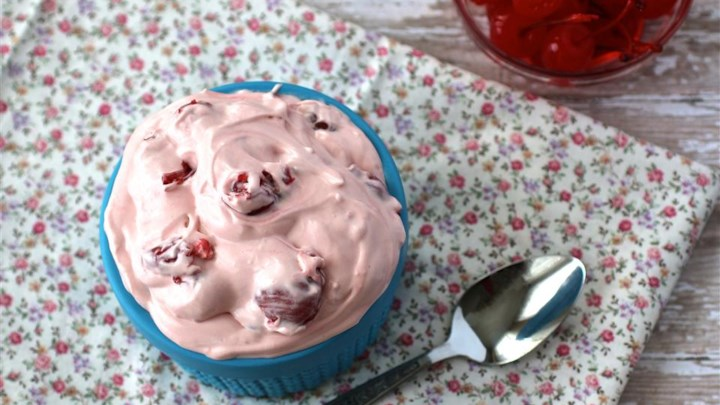

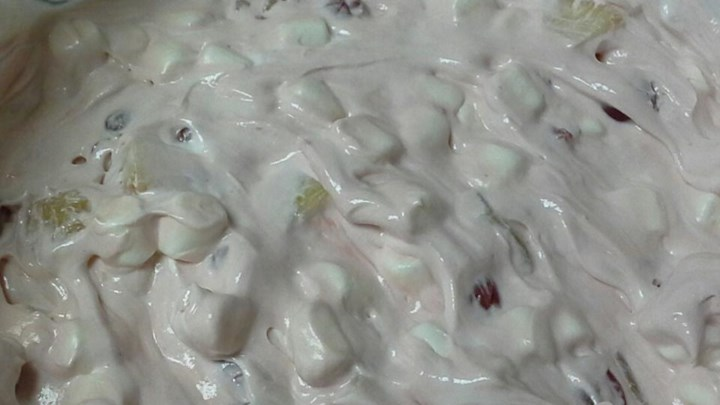

As far as we could see these are all duplicate recipes with different images. Having the same recipe twice is probably not very beneficial to our model, but since there are only 22 pairs out of almost 50 000 recipes, we decide they are too few to worry about and leave them be. 

The average rating is quite high, let's take a closer look at it's distribution:

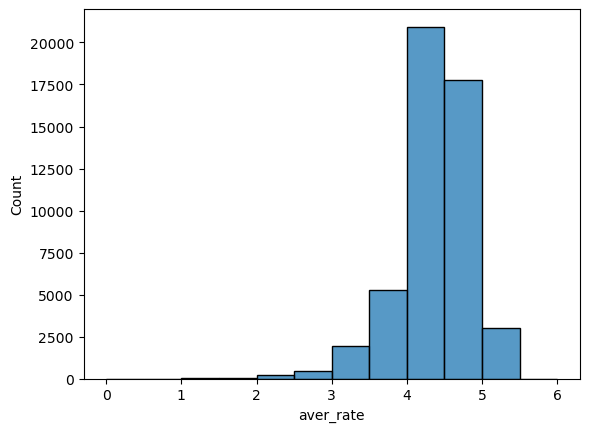

In [15]:
sns.histplot(recipes.aver_rate, binwidth = 0.5, binrange = [0, 6])
plt.show()

This distribution is probably distorted by the biased sampling - only ratings from reviews that are actual text are included, many more ratings without review are not accounted for. This makes comparing recipes' average rating meaningless.

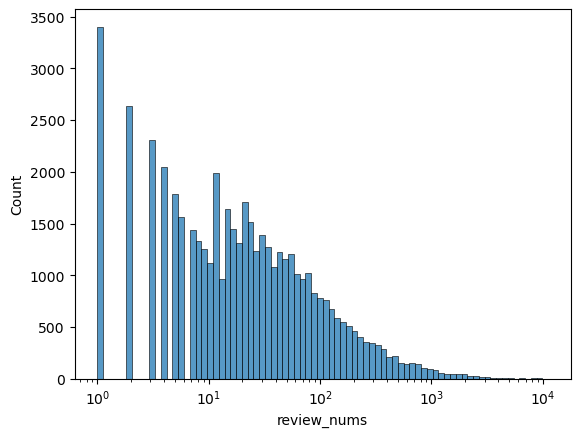

In [18]:
sns.histplot(recipes.review_nums, log_scale = True)
plt.show()

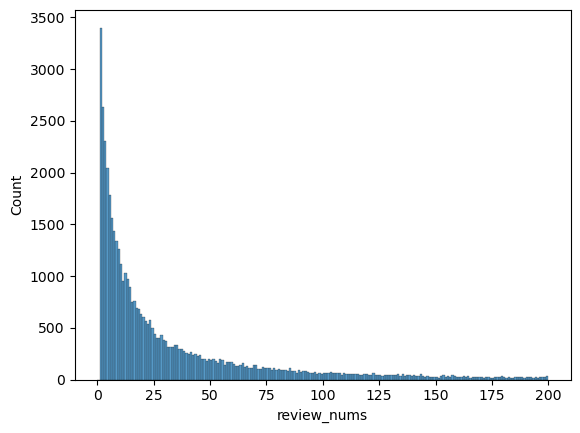

In [21]:
sns.histplot(recipes.review_nums, binwidth = 1, binrange = [0, 200])
plt.show()

In [22]:
recipes.nlargest(10, "review_nums") # most popular

,recipe_id,recipe_name,aver_rate,review_nums,ingredients,cooking_directions,reviews
7567,23600,World's Best Lasagna,4.787341,11191,sweet Italian sausage^lean ground beef^minced ...,{'directions': u'Prep\n30 m\nCook\n2 h 30 m\nR...,"{17170434: {'rating': 5, 'followersCount': 0, ..."
31498,20144,Banana Banana Bread,4.572033,10043,all-purpose flour^baking soda^salt^butter^brow...,{'directions': u'Prep\n15 m\nCook\n1 h 5 m\nRe...,"{1802240: {'rating': 5, 'followersCount': 7, '..."
30839,162760,Fluffy Pancakes,4.820761,9951,milk^white vinegar^all-purpose flour^white sug...,{'directions': u'Prep\n10 m\nCook\n10 m\nReady...,"{15663109: {'rating': 5, 'followersCount': 0, ..."
1062,56927,Delicious Ham and Potato Soup,4.837559,9829,peeled and diced potatoes^diced celery^finely ...,{'directions': u'Prep\n20 m\nCook\n25 m\nReady...,"{14883014: {'rating': 5, 'followersCount': 0, ..."
31571,17652,Banana Crumb Muffins,4.804039,9778,all-purpose flour^baking soda^baking powder^sa...,{'directions': u'Prep\n15 m\nCook\n20 m\nReady...,"{1245184: {'rating': 5, 'followersCount': 0, '..."
31635,21014,Good Old Fashioned Pancakes,4.589609,9672,all-purpose flour^baking powder^salt^white sug...,{'directions': u'Prep\n5 m\nCook\n15 m\nReady ...,"{14778372: {'rating': 5, 'followersCount': 5, ..."
21623,10813,Best Chocolate Chip Cookies,4.602876,9409,butter^white sugar^packed brown sugar^eggs^van...,{'directions': u'Prep\n20 m\nCook\n10 m\nReady...,"{2162694: {'rating': 2, 'followersCount': 4, '..."
31821,6865,To Die For Blueberry Muffins,4.642919,9013,all-purpose flour^white sugar^salt^baking powd...,{'directions': u'Prep\n15 m\nCook\n25 m\nReady...,"{3588096: {'rating': 5, 'followersCount': 0, '..."
20272,25037,"Best Big, Fat, Chewy Chocolate Chip Cookie",4.621253,8352,all-purpose flour^baking soda^salt^unsalted bu...,{'directions': u'Prep\n10 m\nCook\n15 m\nReady...,"{3849507: {'rating': 4, 'followersCount': 0, '..."
18484,15004,Award Winning Soft Chocolate Chip Cookies,4.655546,8234,all-purpose flour^baking soda^butter^packed br...,{'directions': u'Prep\n15 m\nCook\n12 m\nReady...,"{557067: {'rating': 5, 'followersCount': 0, 'm..."


In [23]:
recipes.ingredients = recipes.ingredients.str.split("^")

In [24]:
recipes.ingredients[0]

['pork belly', 'smoked paprika', 'kosher salt', 'ground black pepper']

In [25]:
type(recipes.ingredients[0])

list

In [ ]:
ingredients_flat = [ingredient for recipe in recipes.ingredients for ingredient in recipe]

In [ ]:
ingredients_counter = Counter(ingredients_flat)

In [ ]:
len(ingredients_counter)

38131

In [ ]:
ingredients_counter.total()

454274

In [ ]:
ingredients_counter.most_common(10)

[('salt', 15070),
 ('butter', 13263),
 ('white sugar', 13032),
 ('all-purpose flour', 10257),
 ('garlic', 8113),
 ('water', 7626),
 ('olive oil', 7531),
 ('vanilla extract', 6507),
 ('milk', 6258),
 ('eggs', 5856)]

In [ ]:
ingredients_counter.most_common()[-20:]

[('jalapeno-stuffed green olives', 1),
 ('fluid ounce) jiggers premium tequila', 1),
 ('fluid ounce) jigger orange liqueur', 1),
 ('fluid ounce) jigger sweetened lime juice', 1),
 ('fluid ounces beer (such as Miller® High Life®)', 1),
 ('fluid ounces cola-flavored carbonated beverage (such as Coca-Cola®)', 1),
 ('fresh red currants', 1),
 ('fluid ounces liquid fruit pectin', 1),
 ('Almond Breeze Coconutmilk Almondmilk Original Unsweetened', 1),
 ('Meyer lemon juiced and peeled', 1),
 ('fluid ounces spiced rum (such as Kraken®)', 1),
 ('fluid ounce freshly squeezed orange juice', 1),
 ('fluid ounce white rum (such as Captain Morgan™)', 1),
 ("fluid ounce dark rum (such as Myers's®)", 1),
 ('fluid ounce hibiscus syrup', 1),
 ('fluid ounce almond orgeat syrup (such as Torani®)', 1),
 ('black beans drained and liquid reserved', 1),
 ('fluid ounces reduced calorie cranberry juice cocktail', 1),
 ('fluid ounces reduced calorie lemonade', 1),
 ('crushed jalapeno and habanero peanut brittle (s

measuring units, brands and preparation methods (squeezed) to be removed for accurate counting -> text processing instead of naive vectorization

from i don't remember which article mean(embedding_title, embedding_ingredients, embedding_directions)

In [ ]:
top_20 = ingredients_counter.most_common(20)
most_common_keys = list(reversed([x[0] for x in top_20]))
most_common_counts = list(reversed([x[1] for x in top_20]))

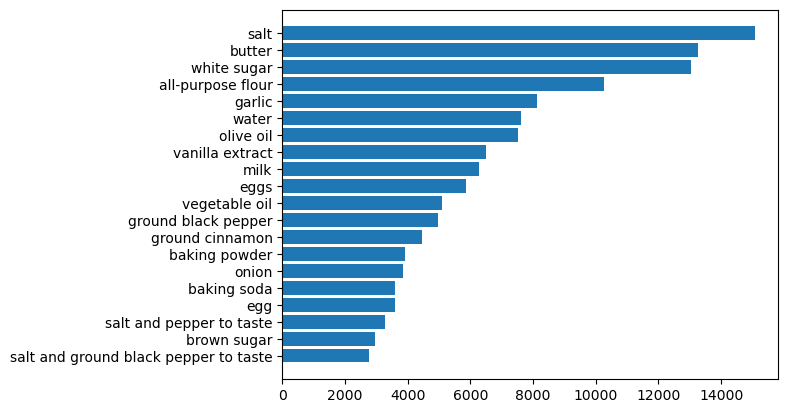

In [ ]:
plt.barh(most_common_keys, most_common_counts)
plt.show()

In [26]:
recipes.cooking_directions = recipes.cooking_directions.apply(ast.literal_eval)

In [27]:
# Make sure there is only "directions" info
assert(recipes.cooking_directions.apply(lambda x: len(x.keys()) == 1).all())
assert(recipes.cooking_directions.apply(lambda x: list(x.keys())[0] == "directions").all())

In [28]:
recipes.cooking_directions[0]["directions"]

'Prep\n5 m\nCook\n2 h 45 m\nReady In\n11 h 50 m\nPreheat oven to 200 degrees F (95 degrees C).\nSeason pork belly with paprika, salt, and pepper. Tightly wrap pork twice in heavy-duty aluminum foil. Place on a baking sheet and bake in the preheated oven for 2 1/2 hours. Turn off the oven; let pork rest in the oven for 1 hour. Remove meat from oven, leaving it wrapped in aluminum foil, and refrigerate at least 8 hours or overnight.\nRemove pork from foil and slice across the grain in 1/4-inch thick slices. Working in batches, cook pork in a non-stick skillet over medium heat until golden and crisped, 6 to 8 minutes per slice.'

In [29]:
# reduce to string
recipes.cooking_directions = recipes.cooking_directions.apply(lambda x: list(x.values())[0])
assert all(isinstance(directions, str) for directions in recipes.cooking_directions)

In [30]:
print(recipes.cooking_directions[0])

Prep
5 m
Cook
2 h 45 m
Ready In
11 h 50 m
Preheat oven to 200 degrees F (95 degrees C).
Season pork belly with paprika, salt, and pepper. Tightly wrap pork twice in heavy-duty aluminum foil. Place on a baking sheet and bake in the preheated oven for 2 1/2 hours. Turn off the oven; let pork rest in the oven for 1 hour. Remove meat from oven, leaving it wrapped in aluminum foil, and refrigerate at least 8 hours or overnight.
Remove pork from foil and slice across the grain in 1/4-inch thick slices. Working in batches, cook pork in a non-stick skillet over medium heat until golden and crisped, 6 to 8 minutes per slice.


`reviews`

In [31]:
interactions = recipes[["recipe_id", "reviews"]]
interactions


,recipe_id,reviews
0,222388,"{8542392: {'rating': 5, 'followersCount': 11, ..."
1,240488,"{3574785: {'rating': 5, 'followersCount': 0, '..."
2,218939,"{13774946: {'rating': 5, 'followersCount': 0, ..."
3,87211,"{1563136: {'rating': 5, 'followersCount': 0, '..."
4,245714,"{2945555: {'rating': 5, 'followersCount': 6690..."
...,...,...
49693,222886,"{2043209: {'rating': 5, 'followersCount': 1509..."
49694,25650,"{1380296: {'rating': 4, 'followersCount': 0, '..."
49695,23544,"{6412992: {'rating': 4, 'followersCount': 7, '..."
49696,170710,"{2381248: {'rating': 5, 'followersCount': 2, '..."


In [ ]:
# pretty print recipe with matching image by id

In [ ]:
# [item for row in matrix for item in row]

### 2.0 Ratings

In [3]:
interactions = pd.read_csv("data/foodRecSys-V1_kaggle/raw-data_interaction.csv")
interactions

,user_id,recipe_id,rating,dateLastModified
0,8542392,222388,5,2017-04-22T12:46:43.663\n
1,11174581,222388,5,2013-06-20T15:50:25.96\n
2,8262477,222388,5,2015-02-14T07:27:51.307\n
3,3574785,240488,5,2017-10-07T18:20:08.973\n
4,12145410,240488,2,2018-01-06T00:06:09.563\n
...,...,...,...,...
3793998,12318233,170710,5,2013-11-03T11:09:47.763\n
3793999,51226,170710,5,2009-07-18T19:33:36.317\n
3794000,1476783,170710,5,2009-07-27T10:21:45.823\n
3794001,1245064,79774,4,2006-01-21T20:57:09.327\n


In [4]:
interactions.dtypes

user_id              int64
recipe_id            int64
rating               int64
dateLastModified    object
dtype: object

In [5]:
interactions.dateLastModified = pd.to_datetime(interactions.dateLastModified, format = "ISO8601")

In [6]:
interactions.describe().T

,count,mean,min,25%,50%,75%,max,std
user_id,3794003.0,4860242.781291,16.0,1404674.0,2954489.0,6384689.0,23463743.0,5010314.80268
recipe_id,3794003.0,61121.799155,6663.0,14235.0,23390.0,78649.0,262956.0,71787.206572
rating,3794003.0,4.513192,1.0,4.0,5.0,5.0,5.0,0.875418
dateLastModified,3794003,2010-10-22 14:10:57.267878656,2000-02-07 21:06:30.137000,2008-02-25 06:23:30.880000,2010-10-25 12:15:48.150000128,2013-12-24 06:31:24.813499904,2018-03-16 07:19:52.260000,NaN


In [7]:
len(interactions.recipe_id.unique()) # == len(recipes)


49698

In [8]:
len(interactions.user_id.unique())

1160267

In [9]:
user_num_reviews = interactions.user_id.value_counts() # number of reviews for each user

In [10]:
user_num_reviews.head()

user_id
2043209    4003
1153011    2496
2945555    2148
268713     2045
827351     1800
Name: count, dtype: int64

Text(0, 0.5, 'Users Count')

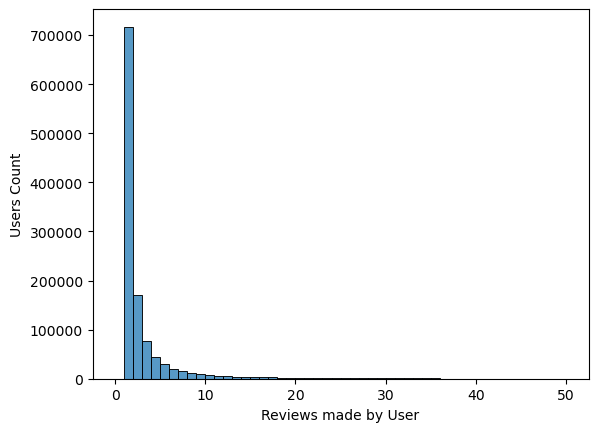

In [11]:
sns.histplot(user_num_reviews, binrange = [0, 50], binwidth = 1)

plt.xlabel("Reviews made by User")
plt.ylabel("Users Count")

In [12]:
user_num_reviews_binned = pd.cut(user_num_reviews, bins=[0, 1, 2, 5, 10, 20, 50, 100, 1000, 2000, 5000]).value_counts()
user_num_reviews_binned

count
(0, 1]          717096
(1, 2]          171381
(2, 5]          151122
(5, 10]          62844
(10, 20]         33791
(20, 50]         18205
(50, 100]         4039
(100, 1000]       1764
(1000, 2000]        21
(2000, 5000]         4
Name: count, dtype: int64

<Axes: xlabel='count'>

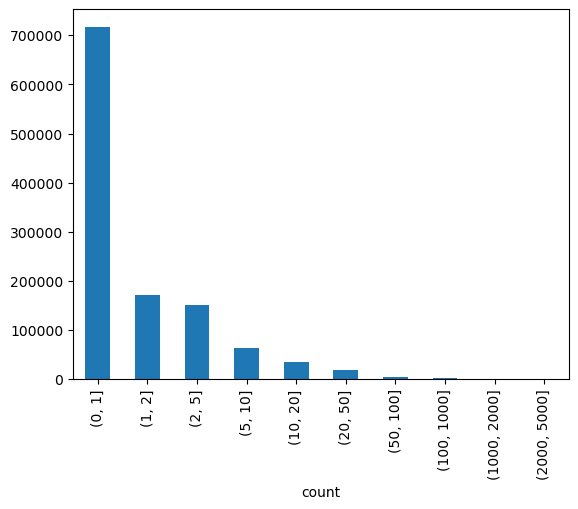

In [13]:
user_num_reviews_binned.plot.bar()

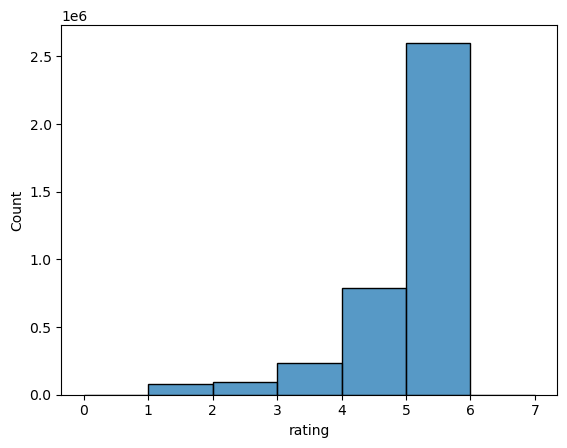

In [14]:
sns.histplot(interactions.rating, binwidth = 1, binrange = [0, 7])
plt.show()

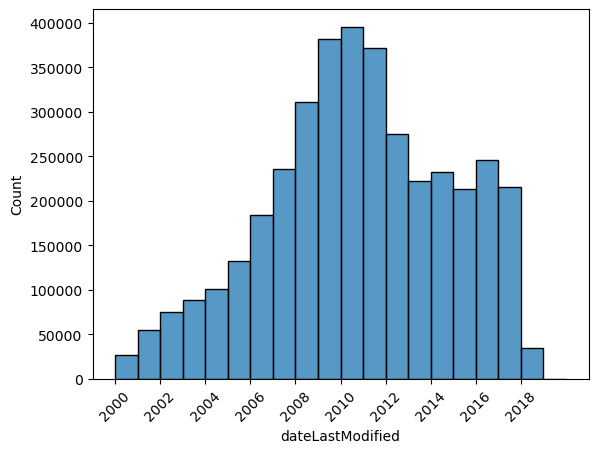

In [15]:
sns.histplot(interactions.dateLastModified.dt.year, binwidth = 1, binrange = [2000, 2020])
plt.xticks(range(2000, 2020, 2), rotation = 45)
plt.show()

In [16]:
# add yearly dateLastModified plot

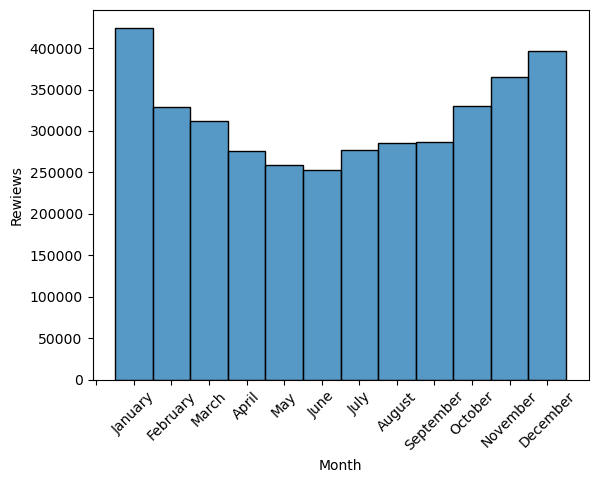

In [17]:
sns.histplot(interactions.dateLastModified.dt.month, binwidth = 1, binrange = [1, 13])

plt.xlabel("Month")
plt.ylabel("Rewiews")
plt.xticks(ticks=np.arange(0.5, 13.5), labels=list(month_name), rotation = 45)

plt.show()

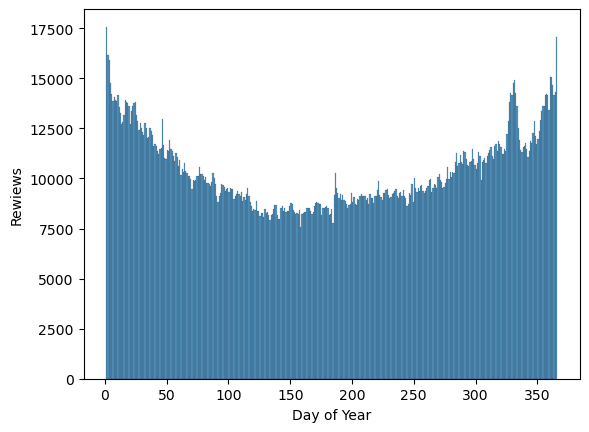

In [18]:
sns.histplot(interactions.dateLastModified.dt.day_of_year, binwidth = 1, binrange = [1, 366])

plt.xlabel("Day of Year")
plt.ylabel("Rewiews")

plt.show()

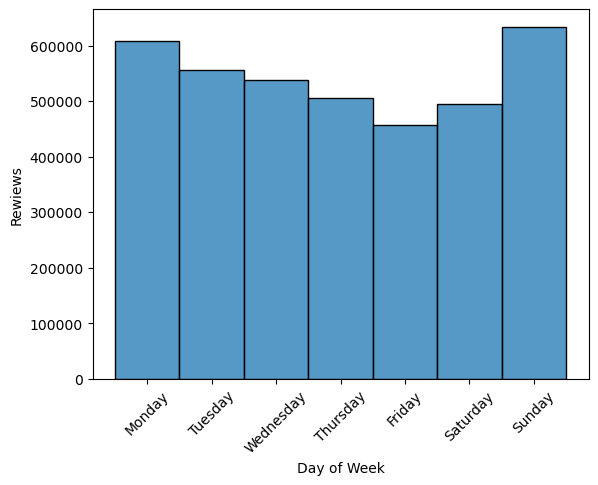

In [19]:
sns.histplot(interactions.dateLastModified.dt.day_of_week, binwidth = 1, binrange = [0, 7])

plt.xlabel("Day of Week")
plt.ylabel("Rewiews")

plt.xticks(ticks=np.arange(0.5, 7.5), labels=list(day_name), rotation = 45)

plt.show()

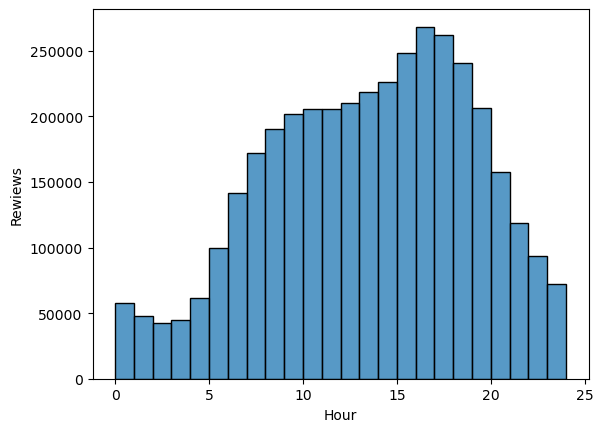

In [20]:

sns.histplot(interactions.dateLastModified.dt.hour, binwidth = 1, binrange = [0, 24])

plt.xlabel("Hour")
plt.ylabel("Rewiews")

plt.show()

155